### 1. Import training set

In [1]:
import numpy as np
import pandas as pd

train = pd.read_csv('train.csv')
print(train.info())
print(train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4993 entries, ID to 9fc776466
dtypes: float64(1845), int64(3147), object(1)
memory usage: 169.8+ MB
None
          ID      target  48df886f9  0deb4b6a8  34b15f335  a8cb14b00  \
0  000d6aaf2  38000000.0        0.0          0        0.0          0   
1  000fbd867    600000.0        0.0          0        0.0          0   
2  0027d6b71  10000000.0        0.0          0        0.0          0   
3  0028cbf45   2000000.0        0.0          0        0.0          0   
4  002a68644  14400000.0        0.0          0        0.0          0   

   2f0771a37  30347e683  d08d1fbe3  6ee66e115    ...      3ecc09859  \
0          0          0          0          0    ...            0.0   
1          0          0          0          0    ...            0.0   
2          0          0          0          0    ...            0.0   
3          0          0          0          0    ...            0.0   
4          0          0 

In [2]:
train.isnull().values.any()

False

#### Something discovered:
1. Features are numeric and anonymized
2. Features seem sparse
3. There are fewer rows than columns

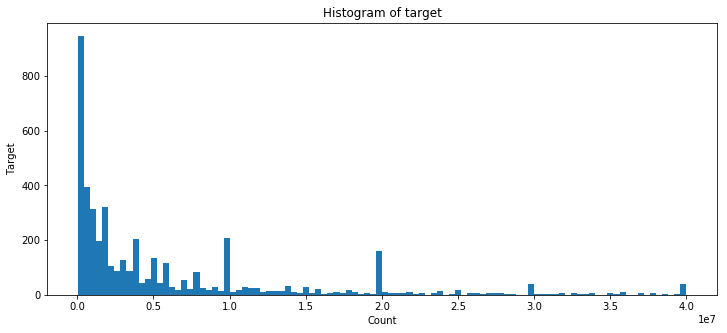

In [3]:
import matplotlib.pyplot as plt

target_train = train['target']

plt.figure(figsize=(12, 5))
plt.hist(target_train.values, bins=100)
plt.title('Histogram of target')
plt.xlabel('Count')
plt.ylabel('Target')
plt.show()

#### The target follows a highly skewed distribution, so make a log(1+x) transfrom

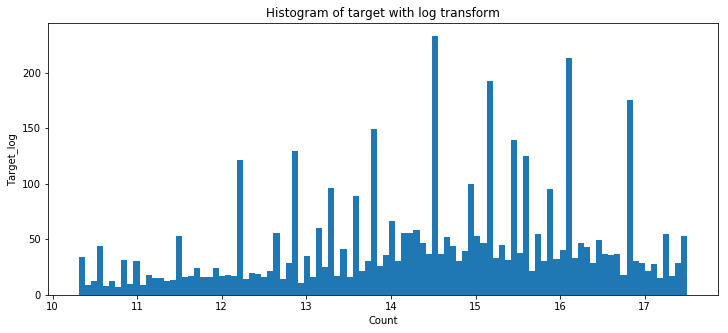

In [4]:
target_train_log = np.log(1+target_train.values)

plt.figure(figsize=(12, 5))
plt.hist(target_train_log, bins=100)
plt.title('Histogram of target with log transform')
plt.xlabel('Count')
plt.ylabel('Target_log')
plt.show()

In [5]:
y_train = train[['target']]
y_train['target'] = np.log(1+train['target'].values)
y_train.describe()

C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,target
count,4459.000000
mean,14.490239
std,1.750947
min,10.308986
25%,13.304687
50%,14.630876
75%,15.894952
max,17.504390


### 2. Feature Selection

In [6]:
feature_df = train.describe().T
feature_df

,count,mean,std,min,25%,50%,75%,max
target,4459.0,5.944923e+06,8.234312e+06,30000.0,600000.0,2260000.0,8000000.0,40000000.0
48df886f9,4459.0,1.465493e+04,3.893298e+05,0.0,0.0,0.0,0.0,20000000.0
0deb4b6a8,4459.0,1.390895e+03,6.428302e+04,0.0,0.0,0.0,0.0,4000000.0
34b15f335,4459.0,2.672245e+04,5.699652e+05,0.0,0.0,0.0,0.0,20000000.0
a8cb14b00,4459.0,4.530164e+03,2.359124e+05,0.0,0.0,0.0,0.0,14800000.0
2f0771a37,4459.0,2.640996e+04,1.514730e+06,0.0,0.0,0.0,0.0,100000000.0
30347e683,4459.0,3.070811e+04,5.770590e+05,0.0,0.0,0.0,0.0,20708000.0
d08d1fbe3,4459.0,1.686522e+04,7.512756e+05,0.0,0.0,0.0,0.0,40000000.0
6ee66e115,4459.0,4.669208e+03,1.879449e+05,0.0,0.0,0.0,0.0,10400000.0
20aa07010,4459.0,2.569407e+06,9.610183e+06,0.0,0.0,0.0,600000.0,319612000.0


#### Some features seem have constant value (variance = 0)

In [7]:
constant_cols = train.columns[train.nunique() == 1]
constant_cols.shape

(256,)

In [8]:
train.drop(constant_cols, axis=1, inplace=True)
train.drop("ID", axis = 1, inplace = True)
train.drop("target", axis = 1, inplace = True)
train.shape

(4459, 4735)

In [9]:
duplicate_cols = []
columns = train.columns
for i in range(len(columns)-1):
    v = train[columns[i]].values
    for j in range(i + 1,len(columns)):
        if np.array_equal(v, train[columns[j]].values):
            duplicate_cols.append(columns[j])
            
train.drop(duplicate_cols, axis=1, inplace=True) 
train.shape

(4459, 4730)

In [10]:
# Feature Scaling: min-max normalization
for feature_name in train.columns:
    
    train[feature_name] = (train[feature_name] - train[feature_name].min()) / (train[feature_name].max() - train[feature_name].min())

train.head()

,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006883,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006258,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
feature_df = train.describe().T
feature_df = feature_df.reset_index().rename(columns = {'index' : 'columns'})
feature_df['var'] = feature_df['columns'].apply(lambda x : np.var(train[x]))
feature_df.head()

,columns,count,mean,std,min,25%,50%,75%,max,var
0,48df886f9,4459.0,0.000733,0.019466,0.0,0.0,0.0,0.0,1.0,0.000379
1,0deb4b6a8,4459.0,0.000348,0.016071,0.0,0.0,0.0,0.0,1.0,0.000258
2,34b15f335,4459.0,0.001336,0.028498,0.0,0.0,0.0,0.0,1.0,0.000812
3,a8cb14b00,4459.0,0.000306,0.015940,0.0,0.0,0.0,0.0,1.0,0.000254
4,2f0771a37,4459.0,0.000264,0.015147,0.0,0.0,0.0,0.0,1.0,0.000229


In [12]:
feature_df = feature_df.sort_values('var', ascending = False)
feature_df

,columns,count,mean,std,min,25%,50%,75%,max,var
766,aca228668,4459.0,0.022716,0.104309,0.0,0.0,0.0,0.00000,1.0,0.010878
853,bc70cbc26,4459.0,0.022988,0.103949,0.0,0.0,0.0,0.00000,1.0,0.010803
896,7e814a30d,4459.0,0.021314,0.100008,0.0,0.0,0.0,0.00000,1.0,0.009999
4393,a09a238d0,4459.0,0.023287,0.099159,0.0,0.0,0.0,0.00000,1.0,0.009830
479,861076e21,4459.0,0.023424,0.098335,0.0,0.0,0.0,0.00000,1.0,0.009668
376,935ca66a9,4459.0,0.022287,0.095751,0.0,0.0,0.0,0.00000,1.0,0.009166
842,e613715cc,4459.0,0.015429,0.095675,0.0,0.0,0.0,0.00000,1.0,0.009152
1528,b85fa8b27,4459.0,0.020066,0.095611,0.0,0.0,0.0,0.00000,1.0,0.009139
3438,3c4df440f,4459.0,0.015229,0.095043,0.0,0.0,0.0,0.00000,1.0,0.009031
1814,2155f5e16,4459.0,0.019947,0.094446,0.0,0.0,0.0,0.00000,1.0,0.008918


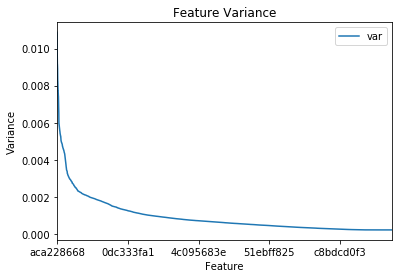

In [14]:
plt.figure()
feature_df.plot(x="columns", y="var")
plt.title('Feature Variance')
plt.xlabel('Feature')
plt.ylabel('Variance')
plt.show()